# Executing the function **mandelgpu()** on GPUs

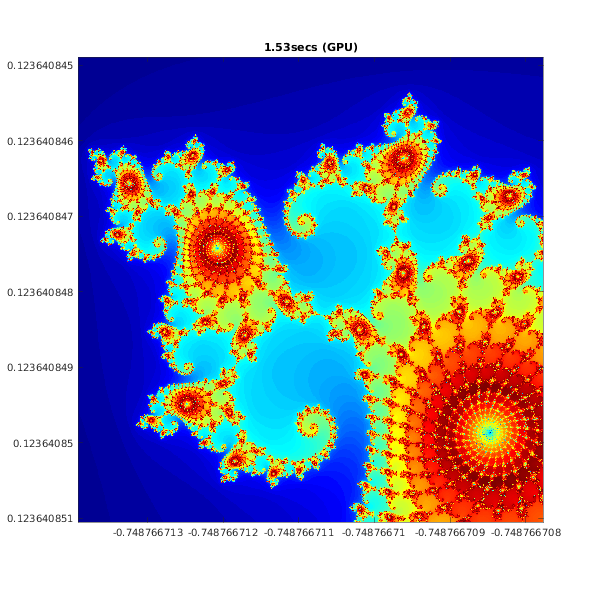

ans = 1.5318

In [1]:

mandelgpu()

function [nativeGPUTime]=mandelgpu
maxIterations = 1000;
gridSize=1000;

xlim = [-0.748766713922161, -0.748766707771757];
ylim = [ 0.123640844894862,  0.123640851045266];

t = tic();

x = gpuArray.linspace( xlim(1), xlim(2), gridSize );
y = gpuArray.linspace( ylim(1), ylim(2), gridSize );

[xGrid,yGrid] = meshgrid( x, y );
z0 = complex( xGrid, yGrid );
count = ones( size(z0), 'gpuArray' );

% Calculate
z = z0;

for n = 0:maxIterations
    z = z.*z + z0;
    inside = abs( z )<=2;
    count = count + inside;
end

count = log( count );

count = gather( count ); % Fetch the data back from the GPU
nativeGPUTime = toc( t );
figure;
fig = gcf;
fig.Position = [200 200 600 600];
imagesc( x, y, count );
axis image
colormap( [jet();flipud( jet() );0 0 0] );
title( sprintf( '%1.2fsecs (GPU)', nativeGPUTime ) );
%print('out-gpu','-dpng');

end

# Calling and executing Scikit-learn ML python script **digits.py** in Matlab

In [2]:
pyrunfile('digits.py')

# digits: 10; # samples: 1797; # features 64
